In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-auction-2023/iplauction2023.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/ipl-auction-2023/iplauction2023.csv')
df


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [4]:
df.head(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD


In [5]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [14]:
information=["name","player style", "nationality","status"]

In [15]:
def analysis(information):
    return df[information].value_counts()

for i in information:
    print(i,"-",analysis(i),'\n', sep='\n')

name
-
name
Harshit Rana         1
Bhanuka Rajapaksa    1
Simarjeet Singh      1
Mohsin Khan          1
Pradeep Sangwan      1
                    ..
Chintal Gandhi       1
Izharulhaq Naveed    1
Shreyas Gopal        1
Sudhesan Midhun      1
Axar Patel           1
Name: count, Length: 309, dtype: int64


player style
-
player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64


nationality
-
nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: int64


status
-
status
RETAINED    158
SOLD         80
UNSOLD       71
Name: count, dtype: int64




**Player Style distribution to categorize the players with their palying styles**

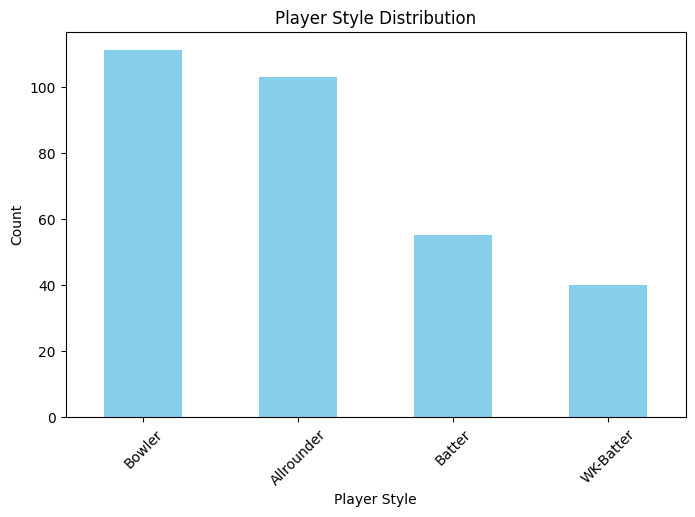

In [17]:
plt.figure(figsize=(8, 5))
style_counts = df['player style'].value_counts()
style_counts.plot(kind='bar', color='skyblue')
plt.title('Player Style Distribution')
plt.xlabel('Player Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Players from different nations are in the IPL so we are doing Nationality distribution**

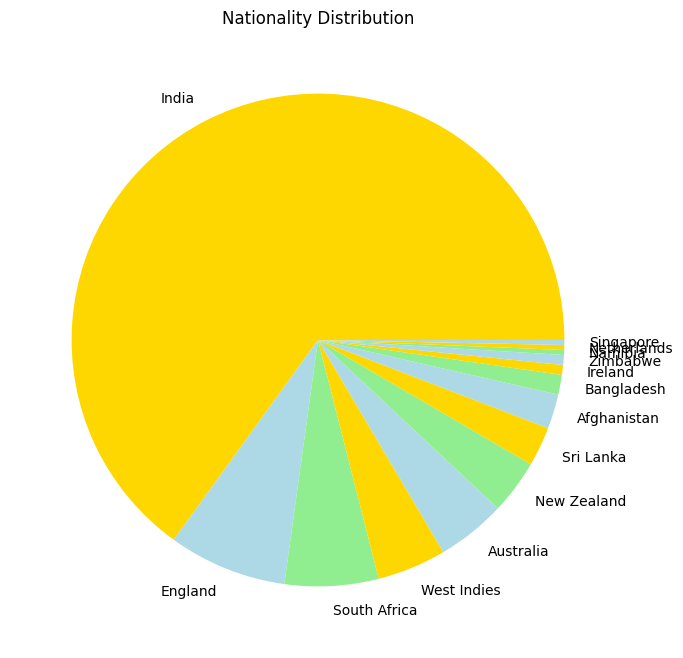

In [21]:
plt.figure(figsize=(8, 8))
nationality_counts = df['nationality'].value_counts()
nationality_counts.plot(kind='pie', colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Nationality Distribution')
plt.ylabel('')
plt.show()


**Franchise distribution (Number of Players in each team)**

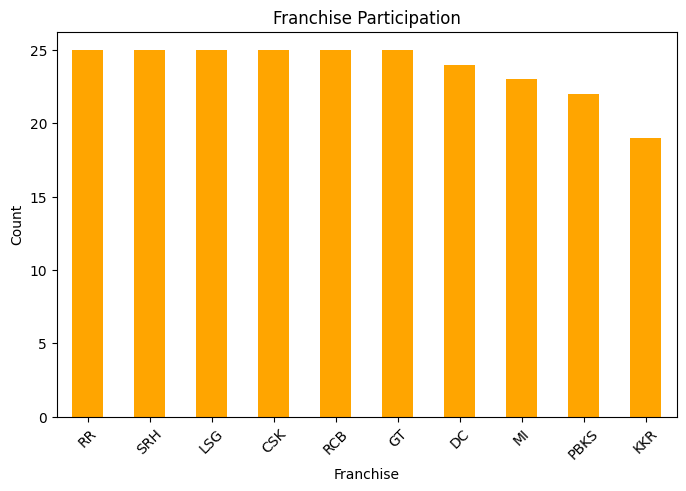

In [22]:
plt.figure(figsize=(8, 5))
franchise_counts = df['franchise'].value_counts()
franchise_counts.plot(kind='bar', color='orange')
plt.title('Franchise Participation')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Price comparision of the players sold this year**

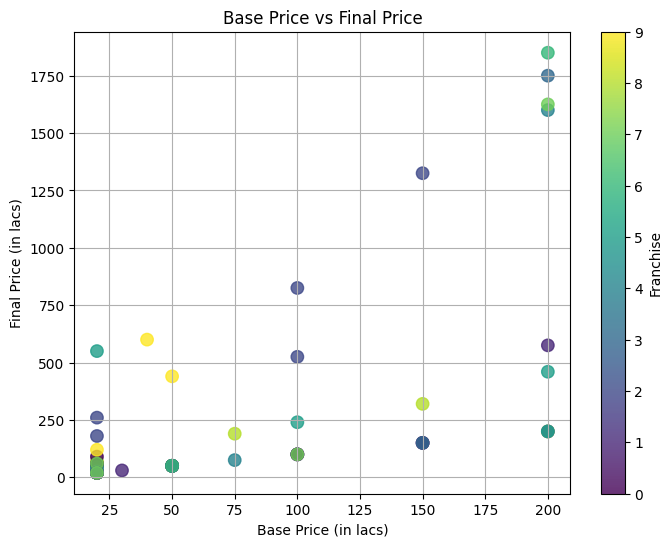

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['base price (in lacs)'], df['final price (in lacs)'], c=pd.factorize(df['franchise'])[0], cmap='viridis', s=80, alpha=0.8)
plt.colorbar(label='Franchise')
plt.title('Base Price vs Final Price')
plt.xlabel('Base Price (in lacs)')
plt.ylabel('Final Price (in lacs)')
plt.grid(True)
plt.show()


**Status Overview**

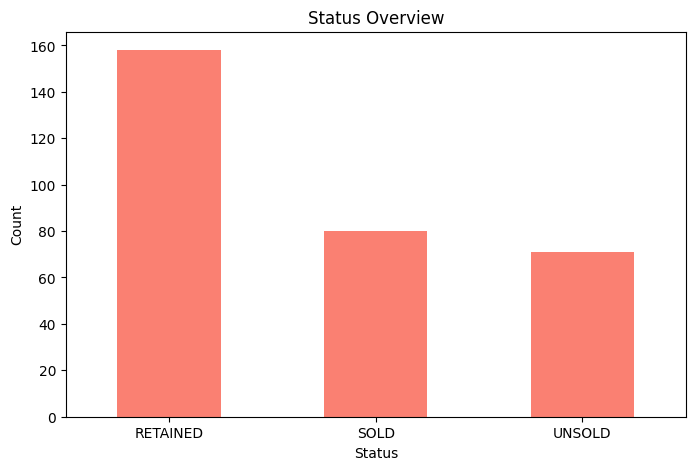

In [25]:
plt.figure(figsize=(8, 5))
status_counts = df['status'].value_counts()
status_counts.plot(kind='bar', color='salmon')
plt.title('Status Overview')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Player with the highest price sold**

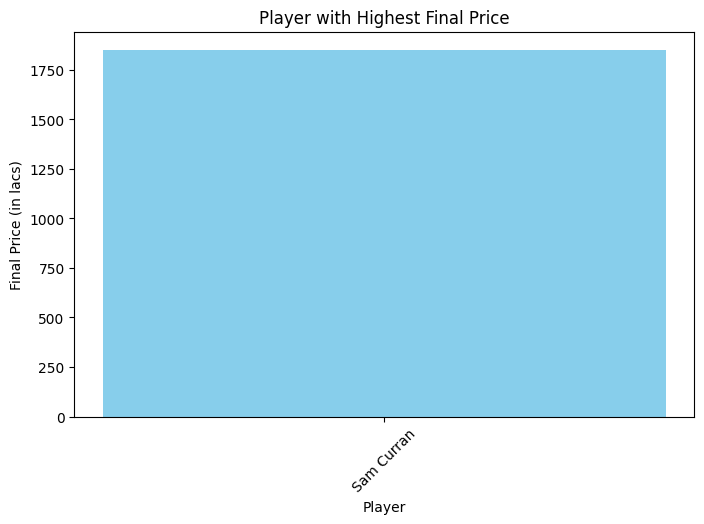

In [44]:

top_price_player = df.loc[df['final price (in lacs)'].idxmax()]

plt.figure(figsize=(8, 5))
plt.bar(top_price_player['name'], top_price_player['final price (in lacs)'], color='skyblue')
plt.title('Player with Highest Final Price')
plt.xlabel('Player')
plt.ylabel('Final Price (in lacs)')
plt.xticks(rotation=45)
plt.show()


**Team to spend highest money**

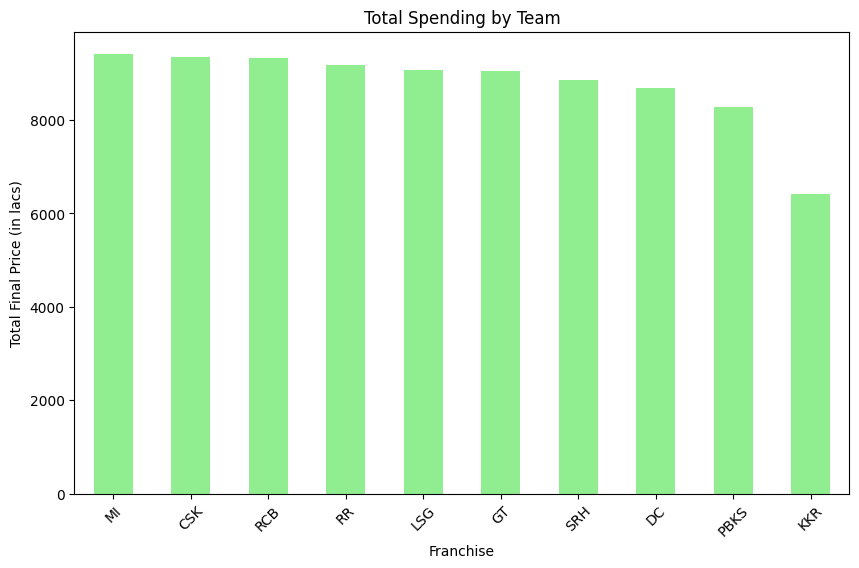

In [45]:

team_spending = df.groupby('franchise')['final price (in lacs)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
team_spending.plot(kind='bar', color='lightgreen')
plt.title('Total Spending by Team')
plt.xlabel('Franchise')
plt.ylabel('Total Final Price (in lacs)')
plt.xticks(rotation=45)
plt.show()


**Team to bet highest amount for a player**

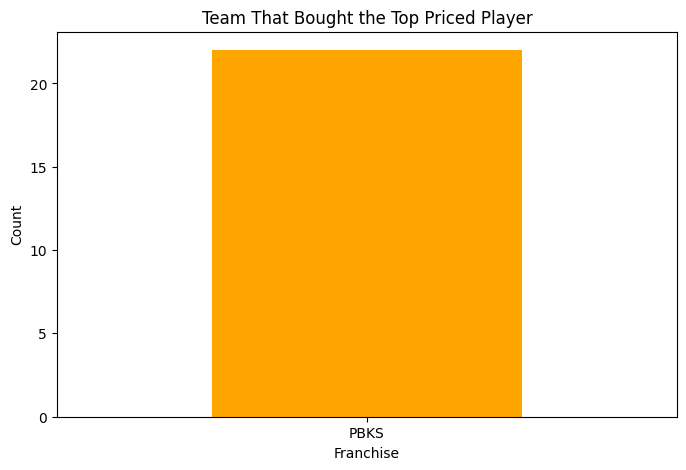

In [46]:
top_player_team = df.loc[df['final price (in lacs)'].idxmax()]['franchise']

plt.figure(figsize=(8, 5))
team_counts = df[df['franchise'] == top_player_team]['franchise'].value_counts()
team_counts.plot(kind='bar', color='orange')
plt.title('Team That Bought the Top Priced Player')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Let's check the top 10 players who are sold with highest money <br>
And check for the top players who are retained by the team**

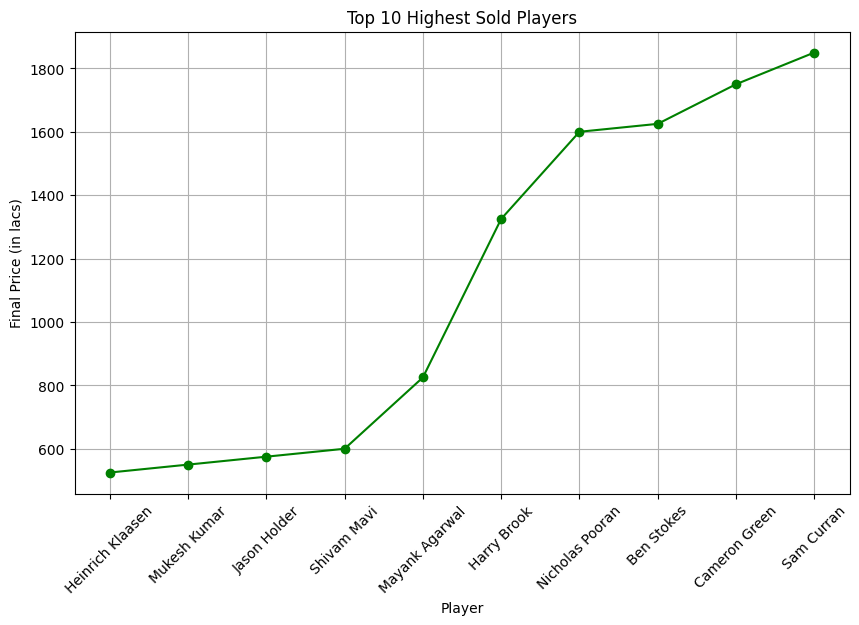

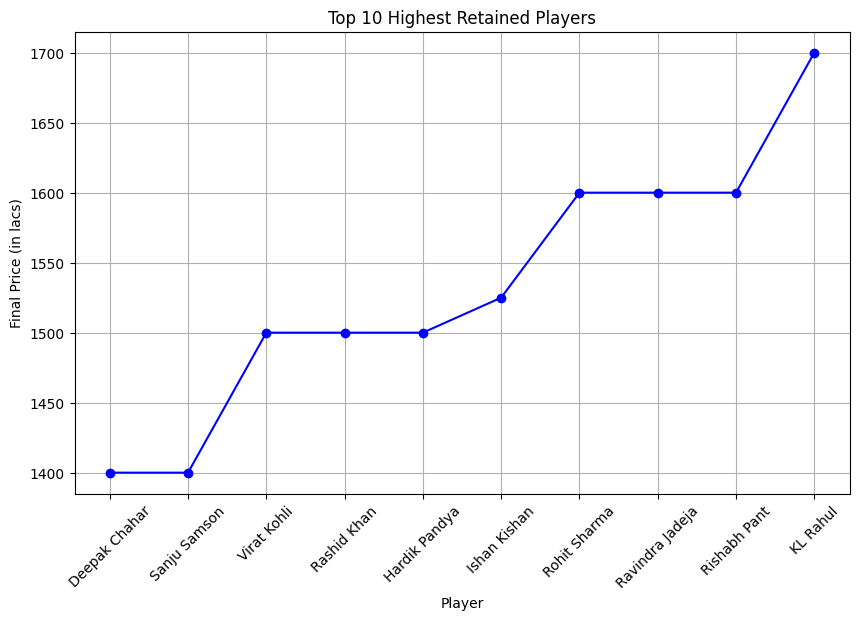

In [48]:
top_10_sold = sold_players.nlargest(10, 'final price (in lacs)').sort_values('final price (in lacs)')
top_10_retained = retained_players.nlargest(10, 'final price (in lacs)').sort_values('final price (in lacs)')

# Plot for top 10 player sold
plt.figure(figsize=(10, 6))
plt.plot(top_10_sold['name'], top_10_sold['final price (in lacs)'], marker='o', linestyle='-', color='green')
plt.xlabel('Player')
plt.ylabel('Final Price (in lacs)')
plt.title('Top 10 Highest Sold Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot for top 10 player retained
plt.figure(figsize=(10, 6))
plt.plot(top_10_retained['name'], top_10_retained['final price (in lacs)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Player')
plt.ylabel('Final Price (in lacs)')
plt.title('Top 10 Highest Retained Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Now finding the team which which has spend how much amount of money in the auction**

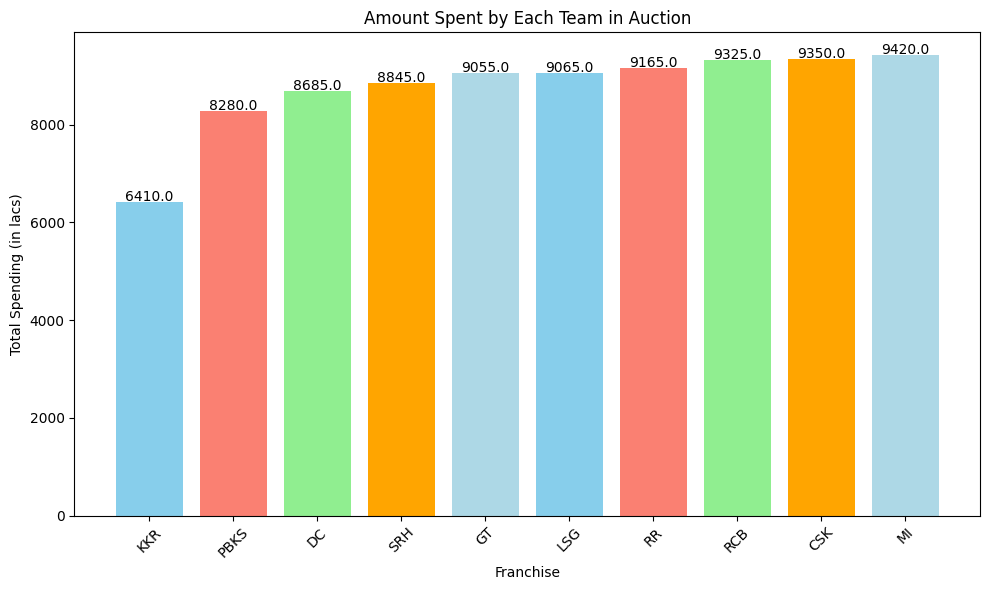

In [56]:

team_spending = df.groupby('franchise')['final price (in lacs)'].sum().sort_values()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue']  # Add more colors if needed

plt.figure(figsize=(10, 6))
plt.bar(team_spending.index, team_spending.values, color=colors[:len(team_spending)])
plt.title('Amount Spent by Each Team in Auction')
plt.xlabel('Franchise')
plt.ylabel('Total Spending (in lacs)')
plt.xticks(rotation=45)


for i, value in enumerate(team_spending.values):
    plt.text(i, value + 20, str(value), ha='center')

plt.tight_layout()
plt.show()


**Check for the number of new players got purchased in the auction and check which team has bought them as well**

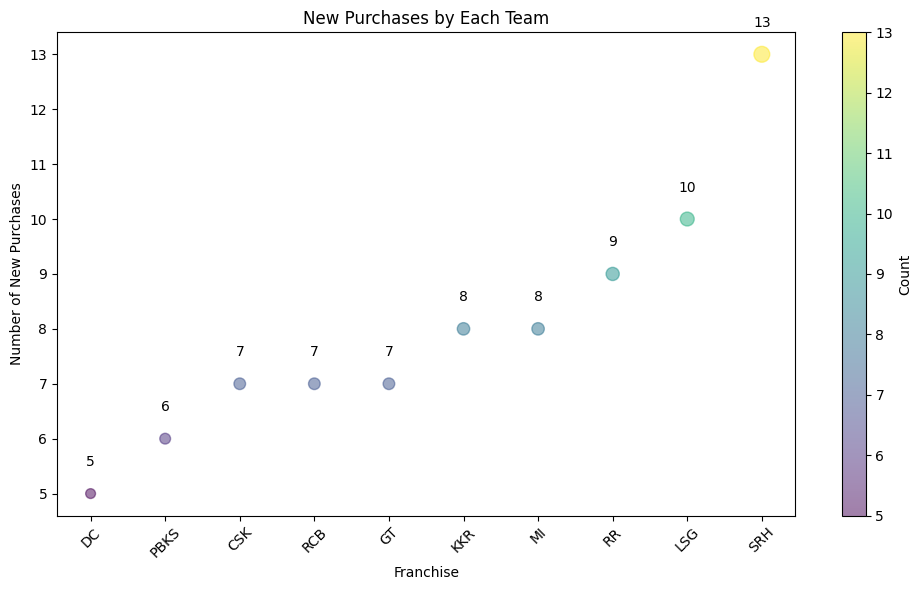

In [58]:
new_purchases = df[df['status'] == 'SOLD']
new_purchases_count = new_purchases['franchise'].value_counts().sort_values()
plt.figure(figsize=(10, 6))
plt.scatter(new_purchases_count.index, new_purchases_count.values, s=new_purchases_count.values*10, alpha=0.5, c=new_purchases_count.values, cmap='viridis')
plt.title('New Purchases by Each Team')
plt.xlabel('Franchise')
plt.ylabel('Number of New Purchases')

for i, value in enumerate(new_purchases_count.values):
    plt.text(new_purchases_count.index[i], value + 0.5, str(value), ha='center')

plt.xticks(rotation=45)
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

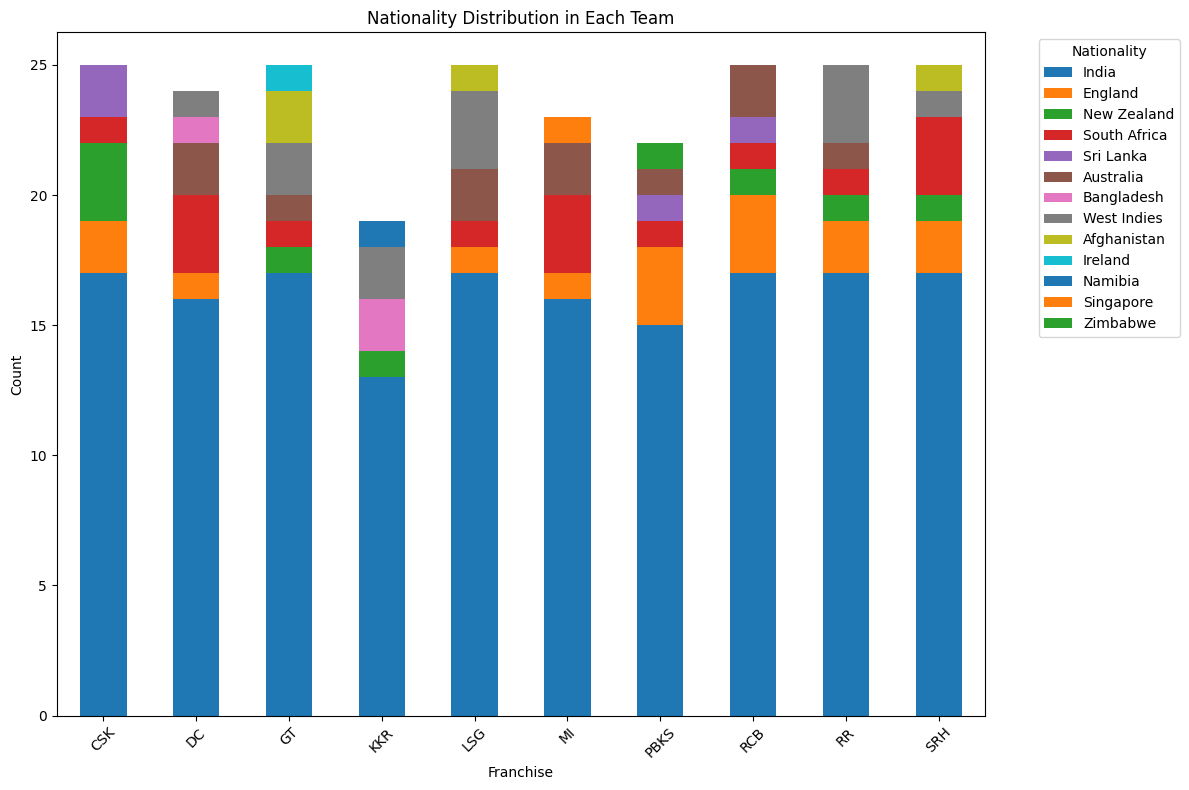

In [66]:
plt.figure(figsize=(12, 8))
nationality_distribution = df.groupby(['franchise', 'nationality']).size().unstack()

# Reordering columns to start with 'India'
nationality_distribution = nationality_distribution[['India'] + [col for col in nationality_distribution.columns if col != 'India']]

# Plotting a stacked bar chart
nationality_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Nationality Distribution in Each Team')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
